# Problem Set 5, due June 4 at 5:30 pm.

As usual, you are highly encouraged to *start this problem set early!*  My best guess (no guarantees!) is that Part 1 will be conceptually easy but perhaps time consuming.  Parts 2 and 3 are medium difficult, but there are plenty of opportunities to get confused with python data structures, so if you're going to get stuck, get stuck (and unstuck) early! Part 4 will give you an opportunity to get some intuition with PCA.

Note that the two extra credit problems have the potential to be quite challenging and time consuming. Make sure to do everything else in the problem set before you tackle the extra credit.

To get started, download the files "reviews.csv" and "movies.dat" from Canvas.

For this assignment, the following libraries may be useful:

* [numpy](http://docs.scipy.org/doc/numpy-dev/user/index.html), for arrays
* [scikit-learn](http://scikit-learn.org/stable/), for machine learning
* [pandas](http://pandas.pydata.org/), for data frames
* [matplotlib](http://matplotlib.org/), for plotting

In particular, I suggest you familiarize yourself with the following aspects of these libraries, which are not required but which might make your life easier:

* `DataFrame` and other basic [data structures](http://pandas.pydata.org/pandas-docs/stable/dsintro.html) in pandas
* [`groupby`](http://pandas.pydata.org/pandas-docs/stable/groupby.html), `unique`,  and other simple aggregation functions
* [`CountVectorizer`](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for working with text in sklearn.
* [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) for Naive Bayes
* Simple tools for [Cross-Validation](http://scikit-learn.org/stable/modules/cross_validation.html) in sklearn

Make sure they load properly with the following code block:

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#hint: Consult the scikit-learn documentation to
#      learn about what these classes do do
from  sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

C:\Users\Jessica\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## Introduction to the assignment

In this assignment, you'll be analyzing movie reviews in an attempt to determine whether movies are good or bad.  I've downloaded a large number of movie reviews from the [Rotten Tomatoes](http://www.rottentomatoes.com) website, which are available in the file "reviews.csv" on Canvas.  I've also put a file "movies.dat" on Canvas that contains metadata for ~65,000 different movies

If you've never seen Rotten Tomatoes before, go spend a few minutes familiarizing yourself with the website.  It's a meta-review website that aggregates movie reviews from a large number of critics.  Here's what the page for this year's likely [Oscar winner](http://www.rottentomatoes.com/m/the_revenant_2015/) looks like.  Note in particular the section on "Critic Reviews" at the bottom -- that's the content that has been scraped and put in the reviews.csv file.  Also note that each movie is given a quantitative score on the Tomatometer which is used to classify the movie as either Fresh (good) or Rotten (bad).

Your mission is to develop a classifier to determine whether a movie is Fresh or Rotten based on the contents of the reviews given to the movie.  As usual, we'll start out with some exploratory data analysis.

---

## Part 1: Descriptive analysis

Before beginning the "real" work, dig into the data a bit do see what you're dealing with.  Begin by loading the datasets and dropping rows that have missing data:

In [2]:
reviews = pd.read_csv('reviews.csv')
movies = pd.read_csv("movies.dat", delimiter='\t')
reviews = reviews[~reviews.quote.isnull()]
reviews = reviews[reviews.fresh != 'none']
reviews = reviews[reviews.quote.str.len() > 0]

In [3]:
movies.head(2)

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,...,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28,13,...,46,5.8,5,2,3,40,3.2,44587,61,http://content8.flixster.com/movie/56/79/73/56...


In [4]:
reviews.head(2)

,critic,fresh,imdb,link,publication,quote,review_date,rtid,title
0,Derek Adams,fresh,114709,http://www.timeout.com/film/reviews/87745/toy-...,Time Out,"So ingenious in concept, design and execution ...",2009-10-04 00:00:00,9559,Toy Story
1,Richard Corliss,fresh,114709,"http://www.time.com/time/magazine/article/0,91...",TIME Magazine,The year's most inventive comedy.,2008-08-31 00:00:00,9559,Toy Story


### 1.1: Basic features of the dataset

Answer the following questions by having your python code directly print the answers:

* How many unique reviews (quotes) are in the `reviews` dataset?
* How many unique reviewers (critics) are in the `reviews` dataset?
* How many unique movies are in the `reviews` dataset?
* How many unique movies are in the *`movies`* dataset?
* How many different publications have reviews in the `reviews` dataset?


In [5]:
# enter your code below
# How many unique reviews (quotes) are in the reviews dataset?
unique_reviews=reviews['quote'].unique()
num_unique_reviews=len(unique_reviews)
# How many unique reviewers (critics) are in the reviews dataset?
unique_critics=reviews['critic'].unique()
num_unique_critics=len(unique_critics)
#How many unique movies are in the reviews dataset?
unique_movies=reviews['title'].unique()
num_unique_movies=len(unique_movies)
#How many unique movies are in the movies dataset?
unique_movies_m=movies['title'].unique()
num_unique_movies_m=len(unique_movies_m)
#How many different publications have reviews in the reviews dataset?
unique_publications=reviews['publication'].unique()
num_unique_publications=len(unique_publications)

In [6]:
print("Number of reviews: %i" % len(reviews))
print("Number of reviews: %i" % num_unique_reviews)
print("Number of reviewers: %i" % num_unique_critics)
print("Number of unique movies in the reviews dataset: %i" % num_unique_movies)
print("Number of unique movies in the movies dataset: %i" % num_unique_movies_m)
print("Number of different publications: %i" % num_unique_publications)

Number of reviews: 13419
Number of reviews: 12814
Number of reviewers: 541
Number of unique movies in the reviews dataset: 1720
Number of unique movies in the movies dataset: 9405
Number of different publications: 64


### 1.2 Number of reviews per reviewer

Using the `reviews` dataset, create a histogram showing the distribution of the number of reviews per reviewer.  Create the bin width (x-axis) to be 1 unit wide, and the range of the axis to be from 0 to 30.  Scale the y-axis to show the logarithm of (count of) the number of reviews.  Label your axes and make your histogram look professional.

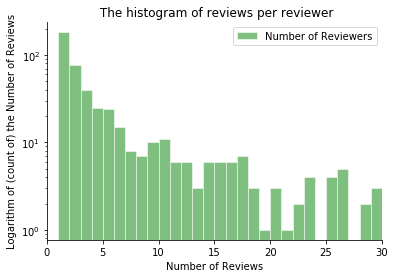

In [7]:
# enter your code here  
%matplotlib inline  
import matplotlib.pyplot as plt 
reviewer_reviews=pd.DataFrame(reviews.groupby('critic').count())
reviewer_reviews.reset_index(level=0, inplace=True)
fig, ax = plt.subplots()
plt.xlim([0, 30])
plt.yscale('log', nonposy='clip')
ax.hist(reviewer_reviews.quote, range=[0,30],bins=30,color=['green'],edgecolor = 'white',alpha=0.5)
plt.ylabel('Logarithm of (count of) the Number of Reviews') # add labels 
plt.xlabel('Number of Reviews')
plt.title(' The histogram of reviews per reviewer')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend(['Number of Reviewers'])
plt.show()

### 1.3 Zoom in on a few reviewers
Find the 30 critics with the most reviews, and list their names in a table along with (a) the name of the publication they work for, (b) the date of their first review, and (c) the date of their last review

*hint: use the groupby function to do this quickly*

In [8]:
Group_Aggregation = reviews[['critic', 'publication', 
                       'review_date', 'quote']].groupby('critic').agg({'review_date': ['max', 'min'], 
                                                                                  'publication': ['max'],
                                                                                 'quote': ['count']})
TOP_30_Critics=Group_Aggregation.sort_values(by=[('quote','count')], ascending = False)[:30]
TOP_30_Critics.reset_index(level=0, inplace=True)
TOP_30_Critics

critic          review_date                       \
                                        max                  min   
0          Roger Ebert  2013-06-11 00:00:00  2000-01-01 00:00:00   
1   James Berardinelli  2012-02-07 00:00:00  1800-01-01 00:00:00   
2         Janet Maslin  2010-09-07 00:00:00  2000-01-01 00:00:00   
3        Variety Staff  2012-08-15 00:00:00  2001-02-13 00:00:00   
4   Jonathan Rosenbaum  2013-10-22 00:00:00  1988-07-11 00:00:00   
5       Desson Thomson  2012-10-08 00:00:00  2000-01-01 00:00:00   
6         Geoff Andrew  2012-04-05 00:00:00  2005-08-11 00:00:00   
7            Dave Kehr  2013-11-20 00:00:00  2000-01-01 00:00:00   
8        Kenneth Turan  2013-10-05 00:00:00  2000-01-01 00:00:00   
9         Mick LaSalle  2009-11-25 00:00:00  2000-01-01 00:00:00   
10     Owen Gleiberman  2011-09-07 00:00:00  1800-01-01 00:00:00   
11        Rita Kempley  2013-11-02 00:00:00  2000-01-01 00:00:00   
12         Joe Baltake  2013-08-04 00:00:00  2000-01-01 00:00:00   
13       Todd McCarthy  2012-10-09 00:00:00  2000-01-01 00:00:00   
14       Vincent Canby  2013-07-29 00:00:00  2000-01-01 00:00:00   
15          Hal Hinson  2013-06-26 00:00:00  2000-01-01 00:00:00   
16         Susan Stark  2002-10-25 00:00:00  2000-01-01 00:00:00   
17      Stephen Holden  2009-02-06 00:00:00  2000-01-01 00:00:00   
18         Derek Adams  2009-10-04 00:00:00  2006-01-26 00:00:00   
19        Kevin Thomas  2013-11-02 00:00:00  2000-01-01 00:00:00   
20         Peter Stack  2002-06-18 00:00:00  2000-01-01 00:00:00   
21     Bosley Crowther  2008-05-06 00:00:00  2000-01-01 00:00:00   
22          Rick Groen  2009-08-14 00:00:00  2002-03-19 00:00:00   
23     Edward Guthmann  2003-04-04 00:00:00  2000-01-01 00:00:00   
24    Lisa Schwarzbaum  2012-08-15 00:00:00  1979-01-01 00:00:00   
25          Liam Lacey  2012-04-04 00:00:00  2001-08-24 00:00:00   
26        Emanuel Levy  2010-08-06 00:00:00  2000-01-01 00:00:00   
27    Richard Schickel  2013-08-05 00:00:00  2000-01-01 00:00:00   
28     Richard Corliss  2013-11-06 00:00:00  2003-12-16 00:00:00   
29  Michael Wilmington  2013-11-21 00:00:00  2000-01-01 00:00:00   

                publication quote  
                        max count  
0         Chicago Sun-Times  1150  
1                 ReelViews   833  
2            New York Times   526  
3                   Variety   449  
4            Chicago Reader   420  
5           Washington Post   373  
6                  Time Out   361  
7       New York Daily News   360  
8         Los Angeles Times   282  
9   San Francisco Chronicle   280  
10     Entertainment Weekly   241  
11          Washington Post   236  
12           Sacramento Bee   231  
13                  Variety   223  
14           New York Times   207  
15          Washington Post   174  
16             Detroit News   167  
17           New York Times   166  
18                 Time Out   154  
19        Los Angeles Times   145  
20  San Francisco Chronicle   138  
21           New York Times   137  
22           Globe and Mail   129  
23  San Francisco Chronicle   121  
24     Entertainment Weekly   117  
25           Globe and Mail   111  
26                  Variety   110  
27             The Atlantic   106  
28            TIME Magazine   104  
29        Los Angeles Times   103

### 1.4 Ratings over time

Using the `movies` dataset, create a plot that shows how the average rating per movie (rtAllCriticsRating) has evolved over time.  Do this by creating a scatterplot where the x-axis is the year in which the movie was released and the y-axis is rtAllCriticsRating.  Drop movies with 0 or unknown values to avoid biasing your results.  Then, create a scatterplot that has one <year,rating> point for each remaining movie, and pick an appropriate size/color/transparency for these points to ensure that the graph looks professional.  In other words, do not simply use the default settings, as this will produce a dense mess of dots that will be hard to interpret.  Finally, overlay on this scatterplot a line graph in orange showing how the average movie rating (the average of rtAllCriticsRating across all movies in a year) has changed over time.  Do you notice a trend?  What do you think it means?

In [9]:
movies.head(2)

,id,title,imdbID,spanishTitle,imdbPictureURL,year,rtID,rtAllCriticsRating,rtAllCriticsNumReviews,rtAllCriticsNumFresh,...,rtAllCriticsScore,rtTopCriticsRating,rtTopCriticsNumReviews,rtTopCriticsNumFresh,rtTopCriticsNumRotten,rtTopCriticsScore,rtAudienceRating,rtAudienceNumRatings,rtAudienceScore,rtPictureURL
0,1,Toy story,114709,Toy story (juguetes),http://ia.media-imdb.com/images/M/MV5BMTMwNDU0...,1995,toy_story,9,73,73,...,100,8.5,17,17,0,100,3.7,102338,81,http://content7.flixster.com/movie/10/93/63/10...
1,2,Jumanji,113497,Jumanji,http://ia.media-imdb.com/images/M/MV5BMzM5NjE1...,1995,1068044-jumanji,5.6,28,13,...,46,5.8,5,2,3,40,3.2,44587,61,http://content8.flixster.com/movie/56/79/73/56...


In [10]:
# drop movies with unknow or non-numeric values 
movies['rtAllCriticsRating'] = movies['rtAllCriticsRating'].apply(pd.to_numeric, errors='drop')
movies['rtAllCriticsNumReviews'] = movies['rtAllCriticsNumReviews'].apply(pd.to_numeric, errors = 'drop')
movies['rtAudienceRating'] = movies['rtAudienceRating'].apply(pd.to_numeric, errors= 'drop')

C:\Users\Jessica\Anaconda3\lib\site-packages\matplotlib\cbook.py:2649: UserWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'
  seen=seen, canon=canonical, used=seen[-1]))


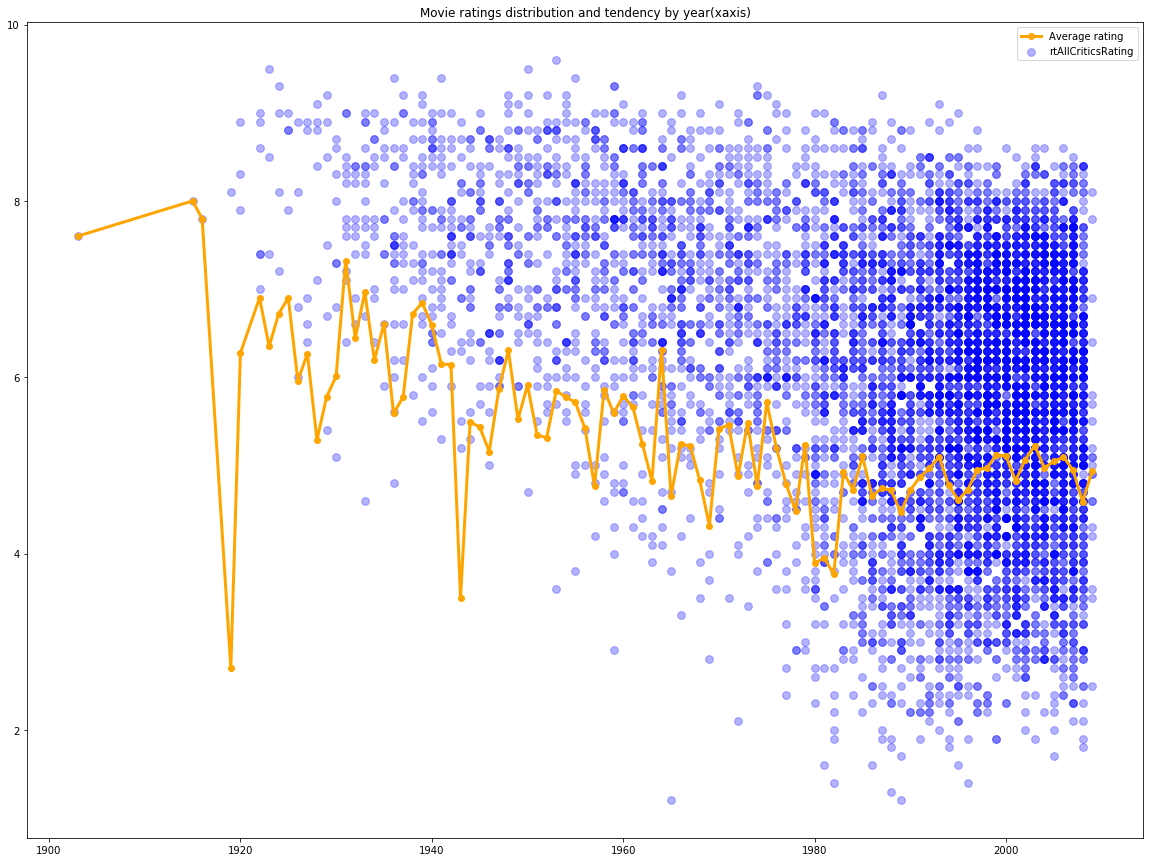

In [11]:
# set the size of the figure 
plt.figure(figsize=(20,15))
# drop movies with 0
movies['rtAllCriticsRating'] = movies['rtAllCriticsRating'].apply(lambda x: x if x >0 else None)
# do the scatter plot 
sctr = plt.scatter(movies['year'], movies['rtAllCriticsRating'], c='blue', s=60)
sctr.set_alpha(0.3)
# calculate the average rating by year 
year_rating= pd.DataFrame(movies.groupby('year')['year'].count())
year_rating.columns = ['count']
year_rating['sumRating'] = movies.groupby('year')['rtAllCriticsRating'].sum()
year_rating['avgRating'] = year_rating['sumRating']/year_rating['count']
year_rating.reset_index(level=0, inplace =True)
year_rating = year_rating.dropna()
#  plot a trend in average rating over the year
plt.plot(year_rating['year'],year_rating['avgRating'], c='#6b00b3', color='orange',linewidth=3.0, marker='o', label='Average rating')
plt.legend()
plt.title('Movie ratings distribution and tendency by year(xaxis)')

*Obeservations*

By observing the scatter plot, we could find that the number of ratings are in a increasing trend as time goes by, which could be potrayed by the increasing density of the points towards the right side of x-axis.

By observing the trend line, we could find the average rating is decreasing over the years. The reason might be the increasing number of movies. The more movies they have, the more difficult it is to distinct a specific or excellent movie with others. As a result, the average rating will be lower. 


---

## Part 2: Naive Bayes

Now it gets fun!  You are going to use a [Naive Bayes classifier](https://en.wikipedia.org/wiki/Naive_Bayes_classifier) to build a prediction model for whether a review is fresh or rotten, depending on the text of the review. Review the assigned readings on Canvas, as well as the relevant lecture notes before embarking on this journey.

### Using CountVectorizer

One thing that may help you in the following problems is the [CountVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) object in Scikit-learn.  This will help you convert your raw text fields into "bag of words" vectors, i.e. a data structure that tells you how many times a particular word appears in a blurb.  Here's a simple example, make sure you understand what's going on!

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

text = ['machine learning rocks', 'machine learning rules', 'rocks rocks rules']
print("Original text is\n", '\n'.join(text))

vectorizer = CountVectorizer(min_df=0)

# call `fit` to build the vocabulary
vectorizer.fit(text)

# call `transform` to convert text to a bag of words
x = vectorizer.transform(text)

# CountVectorizer uses a sparse array to save memory, but it's easier in this assignment to 
# convert back to a "normal" numpy array
x = x.toarray()

#print
print("Transformed text vector is \n", x)

# `get_feature_names` tracks which word is associated with each column of the transformed x

print("Words for each feature:")
print(vectorizer.get_feature_names())

Original text is
 machine learning rocks
machine learning rules
rocks rocks rules
Transformed text vector is 
 [[1 1 1 0]
 [1 1 0 1]
 [0 0 2 1]]
Words for each feature:
['learning', 'machine', 'rocks', 'rules']


### 2.1 Create your X input and Y output

Using the `reviews` dataframe, compute a pair of numerical X, Y arrays where:
    
 * X is a `(nreview, nwords)` array. Each row corresponds to a bag-of-words representation for a single review. This will be the *input* to your model.
 * Y is a `nreview`-element 1/0 array, encoding whether a review is Fresh (1) or Rotten (0). This is the desired *output* from your model.
 
Make sure to remove items with no review text

In [13]:
reviews = reviews[~reviews.quote.isnull()]

In [14]:
"""
Function
--------
make_xy

Build a bag-of-words training set for the review data

Parameters
-----------
reviews : Pandas DataFrame
    The review data from above
    
vectorizer : CountVectorizer object (optional)
    A CountVectorizer object to use. If None,
    then create and fit a new CountVectorizer.
    Otherwise, re-fit the provided CountVectorizer
    using the reviews data
    
Returns
-------
X : numpy array (dims: nreview, nwords)
    Bag-of-words representation for each review.
Y : numpy array (dims: nreview)
    1/0 array. 1 = fresh review, 0 = rotten review

Examples
--------
X, Y = make_xy(reviews)
"""
def make_xy(reviews, vectorizer=None):
    if vectorizer==None:
        vectorizer = CountVectorizer(min_df=0)
        vectorizer.fit(reviews['quote'])
        X = vectorizer.transform(reviews['quote'])
        X=X.toarray()
    else:
        X = vectorizer.transform(reviews['quote'])
        X=X.toarray()
    Y = [1 if x == 'fresh' else 0 for x in reviews.fresh]
    Y=np.array(Y)
    return X, Y

vectorizer.fit(reviews['quote'])
X,Y = make_xy(reviews,vectorizer)

In [15]:
# fresh 1/ rotten 0 

### 2.2 Test-Train split

Next, randomly split the data into two groups: a training set and a validation set.  You can do this manually, as you did in the prior problem set.  Or, use [`train_test_split`](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html) to do this auto-magically.  See [this guide](http://scikit-learn.org/stable/modules/cross_validation.html) for a simple example of how `train_test_split` works.

In [16]:
# enter your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
X, Y, test_size=0.34, random_state=0)

In [17]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(8856, 20875)
(4563, 20875)
(8856,)
(4563,)


### 2.3 Naive Bayes with `MultinomialNB`
Use the training set to train a Naive Bayes classifier using the [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html)
 object.  Report the accuracy of this model on both the training and testing data.  What do you observe?  Interpret these results!

*Hint: This shouldn't take more than 5-10 lines of code to accomplish*



In [18]:
# enter your code here
from sklearn.naive_bayes import MultinomialNB
import numpy as np
MNB = MultinomialNB()
MNB.fit(X_train,y_train)
# call the fitted model fitted_model, for future reference:
fitted_model = MNB.fit(X_train,y_train)

In [19]:
y_train_pred=fitted_model.predict(X_train)
y_test_pred = fitted_model.predict(X_test)

In [20]:
from sklearn import metrics
accuracy_train=metrics.accuracy_score(y_train, y_train_pred)
accuracy_test=metrics.accuracy_score(y_test, y_test_pred)
print("Accuracy of training data: "+str(accuracy_train))
print("Accuracy of testing data: "+str(accuracy_test))


Accuracy of training data: 0.92445799458
Accuracy of testing data: 0.778654394039


*enter your observations here*



The accuracy for the training dateset is 0.9245 and for the testing dataset is 0.7787. 
We could find the accuracy is far more higher in training dataset than that in testing dataset, which means the model is overfitting. 
We need to use cross validation to minimize the overfitting problem. 

### 2.4 (EXTRA CREDIT) Naive Bayes from Scratch!
That was almost too easy, right?  Right.

Your next mission, should you choose to accept it, is to write your own Naive Bayes classifier without relying on `MultinomialNB` or a similar pre-written package.  In addition to the lecture notes and assigned readings, I highly recommend that you review Michael Collin’s lecture notes on Naïve Bayes before starting (available on Canvas).  

**Note:**
You should do this extra credit assignment *after* you have finished the rest of the problem set.  It is very rewarding, but can also be quite time-consuming!

*Hint: You will benefit most from this exercise if you attempt to write the algorithm directly from the lecture notes.  That said, if you really get stuck, Krishnamurthy Viswanathan has written a simple version of [NB in python](http://ebiquity.umbc.edu/blogger/2010/12/07/naive-bayes-classifier-in-50-lines/), which you can peek at if you really get stuck.*

In [21]:
# Your code here


---

## Part 3: Evaluation

### 3.1 Estimate the likelihood of your data

Given a fitted model, you can compute the log-likelihood of your data as a way to assess the performance of your model.  Using `fitted_model.predict_logproba`, the idea is to write a function that computes the log-likelihood of a dataset, so that we can inspect the log-likelihood of your training and testing data given your fitted model from part 2.

To help you out a little bit, we'll do this part for you. But make sure you understand it, because you'll need to use this later!

In [22]:
"""
Function
--------
log_likelihood

Compute the log likelihood of a dataset according to a bayesian classifier. 
The Log Likelihood is defined by

L = Sum_fresh(logP(fresh)) + Sum_rotten(logP(rotten))

Where Sum_fresh indicates a sum over all fresh reviews, 
and Sum_rotten indicates a sum over rotten reviews
    
Parameters
----------
model : Bayesian classifier
x : (nexample, nfeature) array
    The input data
y : (nexample) integer array
    Whether each review is Fresh
"""

def log_likelihood(model, x, y):
    prob = model.predict_log_proba(x)
    rotten = y == 0
    fresh = ~rotten
    return prob[rotten, 0].sum() + prob[fresh, 1].sum()

# output the likelihood of your test data (example - you may need to 
# chance the nambes of the variables below to match your code in 2.2 and 2.3
log_likelihood(fitted_model, X_test, y_test)

-2538.6142904817857

### 3.2 Cross-Validation

Why do we care about the log-likelihood of our data?  You guessed it: Cross-Validation.

Our classifier has a few hyperparameters. The two most important are:

 1. The `min_df` keyword in `CountVectorizer`, which will ignore words which appear in fewer than `min_df` fraction of reviews. Words that appear only once or twice can lead to overfitting, since words which occur only a few times might correlate very well with Fresh/Rotten reviews by chance in the training dataset.
 
 2. The [`alpha` keyword](http://scikit-learn.org/stable/modules/naive_bayes.html#multinomial-naive-bayes) in the Bayesian classifier is a "smoothing parameter" -- increasing the value decreases the sensitivity to any single feature, and tends to pull prediction probabilities closer to 50%. 

How are we are going to use cross-validation to tune these hyperparameters?  The objective function we want to maximize is the log-likelihood of our data.  Fill in the remaining code in this block, to loop over many values of `alpha` and `min_df` to determine
which settings are "best" in the sense of maximizing the cross-validated log-likelihood.

*hint: sklearn has a built-in function, `sklearn.cross_validation.cross_val_score`, that might save you a lot of time here...*

In [23]:
from sklearn import cross_validation
from sklearn.model_selection import cross_val_score
from scipy.optimize import minimize
from sklearn.model_selection import KFold
from sklearn.model_selection import ShuffleSplit

In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
#the grid of parameters to search over
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
max_loglike = -np.inf

for alpha in alphas:
    for min_df in min_dfs:
        vectorizer = CountVectorizer(min_df = min_df)  
        vectorizer = vectorizer.fit(reviews['quote'])
        X, Y = make_xy(reviews, vectorizer)
        CV_xtrain,CV_xtest,CV_ytrain,CV_ytest=train_test_split(X,Y,test_size=0.33,random_state=123)
        fitted_model=MultinomialNB(alpha = alpha)
        log_score = np.mean(cross_val_score(fitted_model,CV_xtrain,CV_ytrain,cv =KFold(5), scoring= log_likelihood))
        if log_score > max_loglike:
            best_alpha = alpha
            best_min_df = min_df
            max_loglike = log_score
print("The best score is ",max_loglike, "with alpha ", best_alpha, "with min_df", best_min_df)  

C:\Users\Jessica\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Jessica\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Jessica\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Jessica\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Jessica\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Jessica\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.featu

The best score is  -984.778941899 with alpha  5 with min_df 0.001


### 3.3 Putting it together

Now that you've determined values for alpha and min_df that optimize the cross-validated log-likelihood, repeat the steps in 2.1-2.3 to train a final classifier with these parameters and re-evaluate the accuracy.  Discuss the various ways in which Cross-Validation has affected the model. Is the new model more or less accurate? Is overfitting better or worse?

In [25]:
#Enter your code here
optimize_vectorizer = CountVectorizer(min_df = best_min_df)
optimize_vectorizer=optimize_vectorizer.fit(reviews['quote'])
X, Y = make_xy(reviews,optimize_vectorizer)
OXtrain,OXtest,OYtrain,OYtest = train_test_split(X, Y, test_size=0.34, random_state=90)
# Fitting the naive Bayes model
cv_fitted_model = MultinomialNB(alpha =best_alpha)
cv_fitted_model.fit(OXtrain, OYtrain)
# Accuracy on the training model.
print("Accuracy on the Training dataset: ", cv_fitted_model.score(OXtrain, OYtrain))
# Accuracy on the training model.
print("Accuracy on the Testing dataset: ", cv_fitted_model.score(OXtest, OYtest))

Accuracy on the Training dataset:  0.790424570912
Accuracy on the Testing dataset:  0.738987508218


*enter your observations here*


In the result of 2.3 where we just use the MultinomialNB in the dataset, we got the accuracy as 0.925 in the training dataset and 0.7756 in the test dataset where there is big discrepancy.

By doing cross-validation and find the optimal hyperparameters in our classifier, we find even though the accuracy in both datasets has decreased, the discrpancy of accuracy between training and testing dataset has decreased a lot. This means our model is more accurated and the overfitting problem is better.

The reason why the model is more accurate might be that the log loss function has penalized  those predictions that are confident but wrong.  By looking the formula of log loss function, we could find it will produce low scores fo observations labeled "fresh" but have a lower predicted probabilities. This is same for the observations labelled as "rotten" having lower predicted probability. 


### 3.4 (Extra Credit)

What happens if you tried this again using a function besides the log-likelihood -- for example, the classification accuracy?  Interpret these results

In [26]:
#Enter your code here
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]
#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
max_score = -np.inf
for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = CountVectorizer(min_df = min_df) 
        vectorizer=vectorizer.fit(reviews['quote'])
        X, Y = make_xy(reviews, vectorizer)
        
        # Performing 10-fold cross validation
    
        CV_xtrain,CV_xtest,CV_ytrain,CV_ytest=train_test_split(X,Y,test_size=0.33,random_state=123)
        fitted_model=MultinomialNB(alpha = alpha)
        log_score = np.mean(cross_val_score(fitted_model,CV_xtrain,CV_ytrain,cv =KFold(5), scoring= 'accuracy'))
        if log_score > max_loglike:
            best_alpha = alpha
            best_min_df = min_df
            max_loglike = log_score

print("The best values of the hyperparameters are:")
print("Alpha = ", best_alpha)
print("Minimum Docment Frequency = ", best_min_df)
print("max score: ",  max_loglike)
#print("Training Score: ", max_score_train)

C:\Users\Jessica\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Jessica\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Jessica\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Jessica\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Jessica\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.feature_log_prob_ = (np.log(smoothed_fc) -
C:\Users\Jessica\Anaconda3\lib\site-packages\sklearn\naive_bayes.py:699: RuntimeWarning: divide by zero encountered in log
  self.featu

The best values of the hyperparameters are:
Alpha =  1
Minimum Docment Frequency =  0.0001
max score:  0.766740823137


In [27]:
optimize_vectorizer = CountVectorizer(min_df = 0.0001)
optimize_vectorizer=optimize_vectorizer.fit(reviews['quote'])
X, Y = make_xy(reviews,optimize_vectorizer)
OXtrain,OXtest,OYtrain,OYtest = train_test_split(X, Y, test_size=0.34, random_state=90)
# Fitting the naive Bayes model
cv_fitted_model = MultinomialNB(alpha =1)
cv_fitted_model.fit(OXtrain, OYtrain)
# Accuracy on the training model.
print("Accuracy on the Training dataset: ", cv_fitted_model.score(OXtrain, OYtrain))
# Accuracy on the training model.
print("Accuracy on the Testing dataset: ", cv_fitted_model.score(OXtest, OYtest))

Accuracy on the Training dataset:  0.910117434508
Accuracy on the Testing dataset:  0.774271312733


*enter your observations here*

By setting the "classification accuracy" as the maximize function, we could get the best alpha as 1 and best min_df is 0.0001. Then we have 0.91 as the accuracy on the training dataset and 0.774 as the accuracy on the testing dataset. It is similar to the default result at the begining and the discrepancy of accuracy between testing and training dataset is higher.

But this is resonable, by maximizing the accuracy, our min_df is much lower than best_min_df in loss log function, which means we just ignore the words having frequency lower than 0.0001. Thus, we will have higher accuracy. But the result is overfitting, since we trained too much on the training dataset. 

In short, if we care more about the accuracy, we could set alpha=1, min_df=0.0001 as the hyperparameters of our classifier. 
If we care more about the generalization, we could set alpha=5, min_df=0.001 as the hyperparameters of our classifier. 






### 3.5 Interpretation

What words best predict a fresh or rotten review?  Using your classifier and the `vectorizer.get_feature_names` method, determine which words best predict a positive or negative review. Print the 10 words that best predict a "fresh" review, and the 10 words that best predict a "rotten" review. For each word, what is the model's probability of freshness if the word appears one time?

#### Hints
* In thinking about how to measure the impact of a word on freshness rating, consider computing the classification probability for a feature vector which consists of all 0s, except for a single 1. What does this probability refer to?
* `numpy.identity` generates an identity matrix, where all values are zero except the diagonal elements which have a value of one

In [28]:
# Enter your code here
# using the above optimum values of min_df and  alpha
opt_vectorizer = CountVectorizer(min_df =best_min_df, stop_words='english')
opt_vectorizer=opt_vectorizer.fit(reviews['quote'])
X, Y = make_xy(reviews, opt_vectorizer)
opt_fitted_model = MultinomialNB(alpha = 5)
opt_fitted_model.fit(X,Y)

# find the features
feature = pd.DataFrame(np.array(opt_vectorizer.get_feature_names()))
feature.rename(columns={0:'words'}, inplace =True)

# creating a indentity matrix 
identity_matrix = np.identity(np.shape(feature)[0])
# calculating the porbability
prob_prediction = opt_fitted_model.predict_log_proba(identity_matrix)
feature['rotten_prob'] = prob_prediction[:,0]
feature['fresh_prob'] = prob_prediction[:,1]

# sorting  based on log probability
print ('Top 10 Best Predictors for "rotten" are:')
print (feature.sort_values('rotten_prob', ascending=False)[['words', 'rotten_prob']].head(10))
print ('\n')
print ('Top 10 Best Predictors for "Fresh" are:')
print (feature.sort_values('fresh_prob', ascending=False)[['words', 'fresh_prob']].head(10))


Top 10 Best Predictors for "rotten" are:
                words  rotten_prob
11071   unfortunately    -0.144555
5920             lame    -0.182887
7804        pointless    -0.188442
11089      uninspired    -0.214523
1125            bland    -0.222216
2931   disappointment    -0.244114
3181             dull    -0.250860
11073         unfunny    -0.252410
10670        tiresome    -0.259467
8944            sadly    -0.259467


Top 10 Best Predictors for "Fresh" are:
               words  fresh_prob
6473     masterpiece   -0.078247
2696         delight   -0.082043
10743       touching   -0.102732
10243         superb   -0.111200
8547      remarkable   -0.111200
5509     intelligent   -0.114661
11653          witty   -0.116582
3731   extraordinary   -0.117804
10121       stunning   -0.117804
2080         complex   -0.118738


*enter your observations here*

The top "rotten" words list are:
[unfortunately, lame,pointless,uninspired,bland,disappointment, dull, unfunny, sadly, tiresome]

The top "fresh" words list are:
[masterpiece,delight, touching, remarkable,superb,intelligent, witty,extraordinary, stunning, complex]


The probability of classification of a feature vector consist of 0s or 1s based on the conditional probability like P("fresh"| i_word), which represents the probability of a "fresh" review given the occurrence of a certain word. In this case, the higher probability of a certain word, the better the predict classification will be. 

It will be idea is the data consist only 0s or 1s. But the predicted classification accuracy will decrease if there are netural words having higher probability that can be used for both fresh and rotten review. 


### 3.6 Error Analysis

One of the best sources for inspiration when trying to improve a model is to look at examples where the model performs poorly.  Find 5 fresh and rotten reviews where your model performs particularly poorly. Print each review.

What do you notice about these mis-predictions? Naive Bayes classifiers assume that every word affects the probability independently of other words. In what way is this a bad assumption? In your answer, report your classifier's Freshness probability for the review "This movie is not remarkable, touching, or superb in any way".

In [29]:
#Your code here
reviews['prediction'] = opt_fitted_model.predict(X)
reviews['outcome'] = (reviews.prediction == reviews.fresh)
prediction_prob = opt_fitted_model.predict_proba(X)
reviews['rotten_prob'] = prediction_prob[:,0]
reviews['fresh_prob'] = prediction_prob[:,1]
wrong_pred = pd.DataFrame(reviews[reviews.outcome == False])
pd.options.display.max_colwidth = 200
# Actual- 'Rotten'; Prediction- 'Fresh'
print("The worst 5 fresh reviews which were actually rotten are:")
print(wrong_pred.sort_values('fresh_prob', ascending = False)['quote'].head(5))
print("--"*117)
# Actual- 'fresh'; Prediction- 'Rotten'
print("The worst 5 rotten reviews which were actually fresh are:")
print(wrong_pred.sort_values('rotten_prob', ascending = False)['quote'].head(6))


The worst 5 fresh reviews which were actually rotten are:
2580     A work of grand visual wit, clever songs, funny gags and genuine pathos, it is perhaps the greatest stop-motion animated film ever, a painstaking style of model animation that computers have all b...
1679     This movie is fascinating in so many different ways: As the story of an extraordinary life, as the reconstruction of the career of one of the greatest of film artists, as the record of an ideologi...
4349     Blake Edwards's 1982 sex comedy has the most beautiful range of tones of any American film of its period: it is a work of dry wit, high slapstick, black despair, romantic warmth, and penetrating i...
12823    As Lion King did before it, Toy Story revived the art of American children's animation, and ushered in a set of smart movies that entertained children and their parents. It's a landmark movie, and...
5        As Lion King did before it, Toy Story revived the art of American children's animation, and usher

*Enter your observations here*

The independent assumption of Naive Bayes will influence the accuracy of prediction when there exits correlation among features. 

For the top 5 Falsly 'fresh' prediction reviews, the most popular words among these reviews are positive words, like : The top most reviews have words like "extraordinary","best","brilliant". There are less negative words. Naive Bayes cannot predict the outcomes considering their relationship. 

For top 5 falsly 'rotten' prediciton reviews, the most popular words are negative words,like "homeless","assassin","careless".  Even if there are positive words, they will not be wighted heavily by the  calssifier since their ferquency are very low.


In [30]:
#report your classifier's Freshness probability for the review "This movie is not remarkable, touching, or superb in any way".
TRIAL= ['This movie is not remarkable, touching, or superb in any way']
TRIAL = opt_vectorizer.transform(TRIAL)
TRIAL= TRIAL.toarray()
print(f'Predicted catergory: {opt_fitted_model.predict(TRIAL)}')
print(f'Predicted probability of being fresh: {opt_fitted_model.predict_proba(TRIAL)[0][1]}')
print(f'Predicted probability of being rotten: {opt_fitted_model.predict_proba(TRIAL)[0][0]}')

Predicted catergory: [1]
Predicted probability of being fresh: 0.997393686324487
Predicted probability of being rotten: 0.002606313675516143


## Part 4: Principal Component Analysis

Just when you thought you were *finally* done with the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing), it has come back to haunt you for a few more minutes.  Make sure you're up and running as you were on the previous problem set:

In [31]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
bdata = load_boston()

In [32]:
print(bdata.keys())
print (bdata.feature_names)

dict_keys(['data', 'target', 'feature_names', 'DESCR'])
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


### 4.1 Remember the last problem set?

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Properly label your axes, and make sure that your graphic looks polished and professional.  If you didn't get full credit for this on the first problem set, get full credit this time!

Then, just as you did on the previous problem set, use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to regress median housing price on average number of rooms per house.  Use a training set consisting of 66% of your instances to fit your regression model.  Report the RMSE on the training and test set.

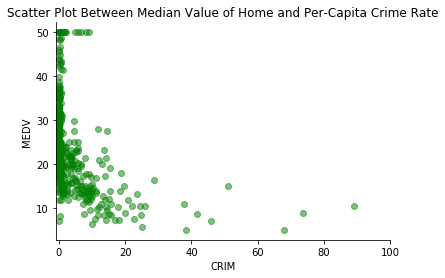

In [33]:
# Enter your code here
import matplotlib.pyplot as plt
fig, ax=plt.subplots()
ax.scatter(bdata.data[:,0],bdata.target,alpha=0.5,color='green')
plt.xlim(-1,100)
plt.title('Scatter Plot Between Median Value of Home and Per-Capita Crime Rate')
plt.xlabel("CRIM")
plt.ylabel("MEDV")
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.show()

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
x=bdata.data[:,5]
x=x.reshape(-1,1)
y=bdata.target
y=y.reshape(-1,1)
trainx, testx, trainy, testy = train_test_split(x, y, test_size=0.34, random_state=0)
OLS_reg = LinearRegression().fit(trainx, trainy)
OLS_pred_train=OLS_reg.predict(trainx)
OLS_pred_test=OLS_reg.predict(testx)
RMSE_train=np.sqrt(mean_squared_error(trainy, OLS_pred_train))
RMSE_test=np.sqrt(mean_squared_error(testy, OLS_pred_test))

In [35]:
print("RMSE on the training data set is: "+str(RMSE_train))
print("RMSE on the testing data set is: "+str(RMSE_test))

RMSE on the training data set is: 6.60572149527
RMSE on the testing data set is: 6.60169540079


### 4.2 So many scatterplots!

Choose 8 out of the 14 features of the housing data that you think are most interesting to study.  Create an 8x8 grid of scatterplots showing how each of these variables relate to each other.  You want to produce something that looks generally like [this image](http://iogas.net/wp-content/gallery/iogas-evaluation/scatterplot-matrix-point-density.png).

In [36]:
print (bdata.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [37]:
features=bdata.data[:,0:7]
features_df=pd.DataFrame(features)
col_name=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE'] 
features_df.columns=col_name
features_df['PTRATIO']=bdata.data[:,-3]
features_df['LSTAT']=bdata.data[:,-1]


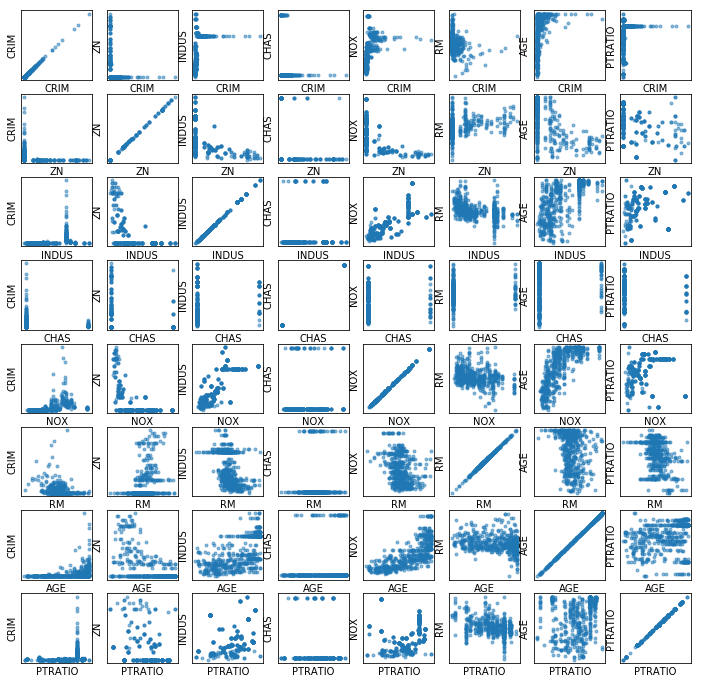

In [38]:

from pandas.plotting import scatter_matrix
plt.figure(figsize=(12,12))
features=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'PTRATIO', 'LSTAT']
for i in range(8):
    for j in range(8):
        plt.subplot(8, 8, i * 8 + j + 1)
        # insert your code here
        plt.scatter(features_df[features[i]],features_df[features[j]], alpha = 0.5, s=9) 
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(features[i])
        plt.ylabel(features[j])
        

### 4.3 PCA to the rescue

Run principal component analysis using [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from sklearn to find the first 12 principal components of your data.  Use only your training set (66% of the data), and use all features *except* the median housing price.  Create a figure showing how the amount of variance explained by your components increases as you increase the number of components from 1 to 12.

In [39]:
# Enter your code here
from sklearn.decomposition import PCA
xinput=bdata.data[:,:]
Xtrain, Xtest,Ytrain,Ytest= train_test_split(xinput,bdata.target, test_size=0.34, random_state=0)
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  
Xtrain = sc.fit_transform(Xtrain)  
Xtest = sc.transform(Xtest)
pca = PCA(n_components=12)
pca.fit_transform(Xtrain) 


array([[ 0.49963072,  3.28444232,  0.91908032, ...,  0.57370176,
         0.34175474, -0.79095874],
       [ 1.58936172, -1.30537861,  0.18181804, ..., -0.63230932,
        -0.19168623, -0.09519794],
       [ 3.54050126, -0.44598573,  0.60794095, ..., -0.34488099,
        -0.15709024, -0.07668652],
       ..., 
       [ 0.05255918,  0.64312384, -0.59897134, ...,  0.31538265,
        -0.07666216, -0.49053101],
       [-0.94085461,  0.08118736, -1.51237339, ..., -0.57295899,
         0.7294745 , -0.42044898],
       [-0.37278309,  0.7974566 , -1.30383438, ...,  0.26347066,
        -0.37579018, -0.61255682]])

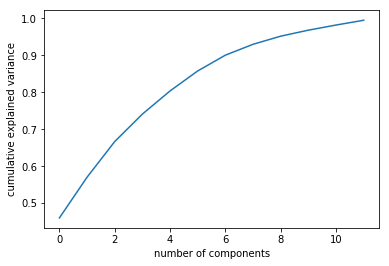

In [40]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

### 4.4 Visualizing the components

Create a 1X3 grid containing three scatter plots of your training data:

1. PCA 1 vs. PCA 2 (you will need to use `fit_transform` to project your training data onto these two components)
2. PCA 1 (x-axis) vs. median housing value
3. PCA 2 vs. median housing value

C:\Users\Jessica\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


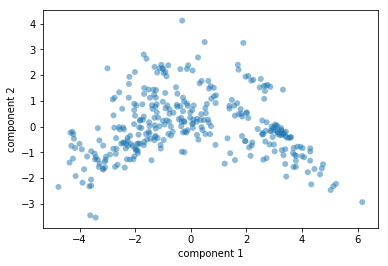

In [41]:
# PCA 1 vs. PCA 2
pca_2 = PCA(12)  # project to 2 dimensions
projected_2 = pca_2.fit_transform(Xtrain)
plt.scatter(projected_2[:, 0], projected_2 [:, 1],
           edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')

C:\Users\Jessica\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


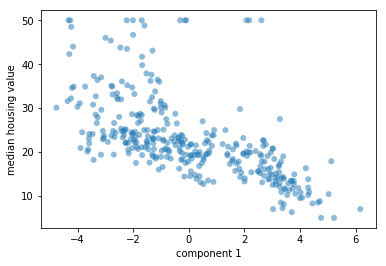

In [42]:
#PCA 1 (x-axis) vs. median housing value
plt.scatter(projected_2[:, 0], Ytrain,
           edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('median housing value')

C:\Users\Jessica\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


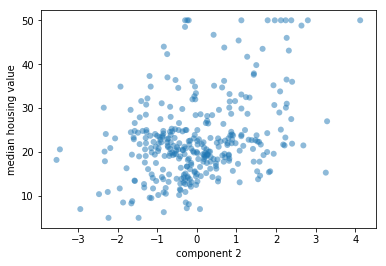

In [43]:
#PCA 2 vs. median housing value
plt.scatter(projected_2[:,1], Ytrain,
           edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 2')
plt.ylabel('median housing value')

### 4.5 Regression and PCA

Using just the first Principal Component learned on the training data, project all of your data (including the test data) onto this 1-dimensional subspace using the `fit_transform` function.  Now, using your training data, fit a regression of median housing price on this first principal component of your data.  Report the RMSE of this regression for both the training and test set.  How do these results compare to your results from 4.1?  Interpret your results!

In [44]:
scaler=StandardScaler()
bdata_scale=scaler.fit_transform(bdata.data)
bdata_scale_df=pd.DataFrame(bdata_scale)
bdata_scale_df.columns=bdata.feature_names

In [45]:
pca_1=PCA(1)
all_data_fit=pca_1.fit_transform(bdata_scale_df)
#all_data_fit=pca_1.transform(bdata_scale_df)

In [46]:
x_proj_train,x_proj_test,y_proj_train,y_proj_test=train_test_split(all_data_fit,bdata.target,test_size=0.34, random_state=456)

In [47]:
linear_reg_pca=LinearRegression()
X_pca=np.array(x_proj_train).reshape(-1,1)
Y_pca=np.array(y_proj_train).reshape(-1,1)
linear_reg_pca=linear_reg_pca.fit(X_pca,Y_pca)
y_pca_predict=linear_reg_pca.predict(X_pca)
RMSE_pca=np.sqrt(mean_squared_error(Y_pca,y_pca_predict))
RMSE_pca

7.0414104367638162

In [48]:
linear_reg_pca=LinearRegression()
X_pca_test=np.array(x_proj_test).reshape(-1,1)
Y_pca_test=np.array(y_proj_test).reshape(-1,1)
linear_reg_pca=linear_reg_pca.fit(X_pca_test,Y_pca_test)
y_pca_test_predict=linear_reg_pca.predict(X_pca_test)
RMSE_pca_test=np.sqrt(mean_squared_error(Y_pca_test,y_pca_test_predict))
RMSE_pca_test

7.6818037219485804

According to the result of 4.1, the RMSE for the linear regression with original all features are 6.60572 on the training data set and 6.601695 on the testing dataset.
According to the result of 4.5 where we use the first component of PCA as the independent variable to do the regression, we get the RMSE as 7.04141 on the training dataset and 7.6818 on the testing data set. The RMSE has only increased around 0.4 point on both training dataset and testing dataset by reducing 13 features to 1 main feature. So, we could conclude thay PCA is a very valid dimension reduction method and it could grasp most information from original datasets. 
